# Notebook for Generating PDF from dI/I

## Theory of Electron Scattering

See [Centurion et al](https://www.annualreviews.org/doi/abs/10.1146/annurev-physchem-082720-010539) for a full discription of the theory. 

Electrons being scattered by an arbitrary electric field, $V(\vec{r})$, can be described using the Born approximation to the Schrodinger equation via: 

\begin{equation}
\tag{1}
f(\vec{s}) = {m \over 2 \pi \hbar^{2}} \int exp(-i \vec{s} \cdot \vec{r'}) V(\vec{r'}) d^{3} r' \label{eq1}
\end{equation}

where $\vec{s}$ is the momentum transfer of the scattered electron with mass $m$. In MeV-UED experiments, the dominant electron-matter interaction is Coulombic, thus it is possible to represent the scattered wave function by a Fourier transform of the Coulombic potential field. 

\begin{equation}
\tag{2}
f(\vec{s}) = {m e \over 2 \pi \varepsilon_0 \hbar} {1 \over 2} \int exp(-i \vec{s} \cdot \vec{r}) \rho (\vec{r}) d^{3} r \label{eq2}
\end{equation} 

Here, $\rho(\vec{r})$ is the charge distribution of the sample and $s^{-2}$ is a prefactor. Equation 2 shows that the amplitude of the elastic scattering is proportional to the Fourier transform of $\rho(\vec{r})$.

The charge density of the nucleus and the electron of an atom with an atomic number $Z$ can be given by 

\begin{equation}
\tag{3}
\rho(r) = Ze\delta(\vec{r}) + \rho_{e}(r)
\end{equation} 

where $r$ is the radial dimension in spherical coordinates. In combination with the atomic form factor equation of X-ray scattering, $F(s)$

\begin{equation}
\tag{4}
F(s) = 4\pi \int \rho_{e}(r) {\sin (sr) \over sr} r^{2} dr
\end{equation} 

equation 2 can be rewritten as 

\begin{equation} 
\tag{5}
f(s) = {me^{2} \over 2 \pi \varepsilon_{0} \hbar^{2}} {1 \over 2} \lbrack Z-F(s) \rbrack
\end{equation} 

Assuming the independent atom model (IAM), the elastic scattering of a molecule made of $N$ atoms is defined as 

\begin{equation}
\tag{6}
f_{M}(\vec{s}) = \sum_{i=1}^{N} f_{i} (s) e^{i\vec{s} \cdot \vec{r_{i}}}
\end{equation}

where $f_{i}(s)$ is the atomic form factor of the atom as given by Equation 5 and $\vec{r_{i}}$ is the position of vector of the atom. 

Following this, the total scattering of the molecule $I(s)$ of randomly oriented molecules can be found by 

\begin{equation}
\tag{7}
I(s) = I_{at} + I_{mol} = \sum_{i=1}^{N} |f_{i}(s)|^{2} + \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} f_{i}^{\ast}(s) f_{j}(s) { \sin (s r_{ij}) \over s r_{ij}}
\end{equation}

Equation 7 gives the result of the IAM of a rigid molecule of an randomly oriented ensemble. See Centurion et al for additional corrections to Equation 7. 

When processing MeV-UED data, the scattering signal is best represented by 

\begin{equation}
\tag{8}
sM(s) = s {I_{mol} \over I_{at}}
\end{equation} 

The real-space pair distribution function (PDF) is found to be proportional to the probability of finding an atom pair at a distance $r$. This probability is given by

\begin{equation} 
\tag{9}
P(r) = r \int_{0}^{\infty} sM(s) \sin{sr} ds \approx r \int_{s_{min}}^{s_{max}} sM(s) \sin(sr) e^{-\alpha s^{2}} ds
\end{equation} 

As no experiment can measure out to an infinite $s$ value, the above approximation is applied where $e^{-\alpha s^{2}}$ is a damping factor. The following code produces simulated scattering patters based on computed xyz coordinates of a given molecule. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued_theory as gt
import datetime

## Simulate Static Scattering

In [15]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/' # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
mol_name='o-ntph_opt'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

f=gt.import_DCS(55)
s000=gt.import_s()
s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

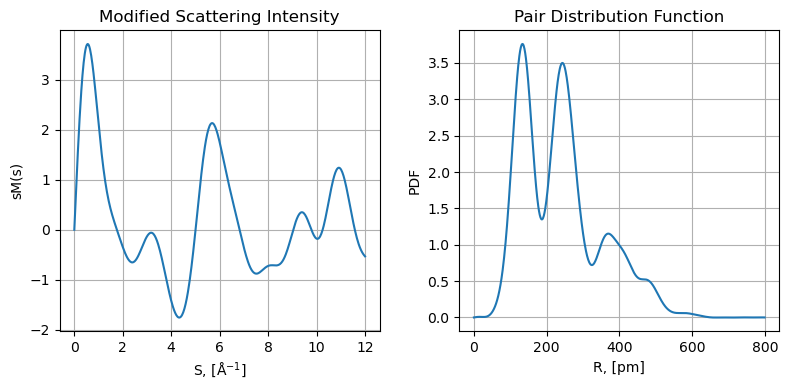

In [16]:
[coor,atom_sum]  = gt.load_static_mol_coor(path_mol,mol_name,file_type);
[I_new,I_at_new,I_mol_new,s_new] = gt.get_I_from_xyz(f,s000,s_max,coor,atom_sum);
[sM_new,PDF_new,r_new]       = gt.get_sM_and_PDF_from_I(I_at_new,I_mol_new,s_new,r_max,damp_const)
# plot_I_sM_PDF(I,sM,PDF,s,r,mol_name+' I elastic',mol_name+' sM',mol_name+' PDF'); # use or not using plot-function 
plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s_new,sM_new);
plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('sM(s)');plt.title('Modified Scattering Intensity');plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r_new,PDF_new);
plt.xlabel(r'R, [pm]');
plt.ylabel('PDF');
plt.title('Pair Distribution Function');
plt.grid()
    
plt.tight_layout()
plt.show()

## Load Experimental Data

In [4]:
day = datetime.date.today()
#day = "2023-12-28"
print(day)

2024-06-12


In [5]:
dI_I = np.loadtxt(f"data_files/dI_corrected_s1_fast_{day}.txt")
s_exp = np.loadtxt(f"data_files/s_s1_fast_{day}.txt")
realtime = np.loadtxt(f"data_files/realtime_s1_fast_{day}.txt")
stage_positions = np.loadtxt(f"data_files/stage_s1_fast_{day}.txt")
norm_data = np.loadtxt(f"data_files/norm_data_s1_fast_{day}.txt")
norm_ref = np.loadtxt(f"data_files/norm_ref_s1_fast_{day}.txt")


## Calculate s Calibration Value

In [6]:
path_mol='packages/Molecular_coordinates/'    # The molecular .xyz/.csv pathes
mol_name='o-ntph_opt'
file_type='.xyz'# Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

f     = gt.import_DCS(55) # Form factor (partial scattering crosssecton), loadint the IAM form factor with z<55, probably enough for most of orgnic molecules
s000  = gt.import_s()     # Q axis 
s_max = 12             # Max Q range
r_max = 800            # Max R range in pm
damp_const=33          # damping factor

left   = 1   # Left side range in S
right  = 9.5     # Right side range in S

s_cali = gt.scan_s_calibration(0.0215, 0.025, left,right,f,s000,s_max,coor,atom_sum,damp_const,r_max, norm_ref)
print(s_cali)

s_calibration: 0.02268 angs^-1/pixel
0.02268


## Check s Calibration Fit to Experimental Data

zeros:
[1.7566880318841438, 5.084273520805244, 6.671723086914328, 8.96299480592707, 9.937435647048487, 10.37918274229225]


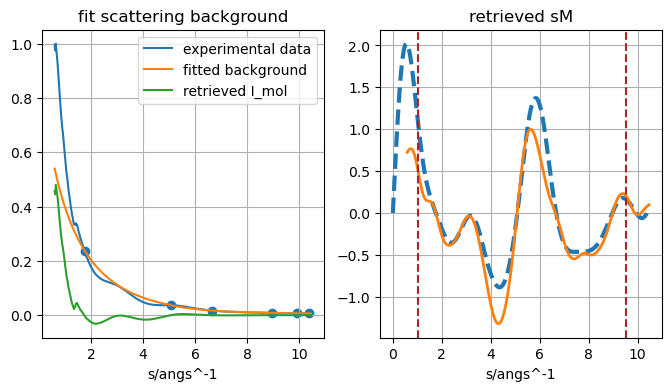

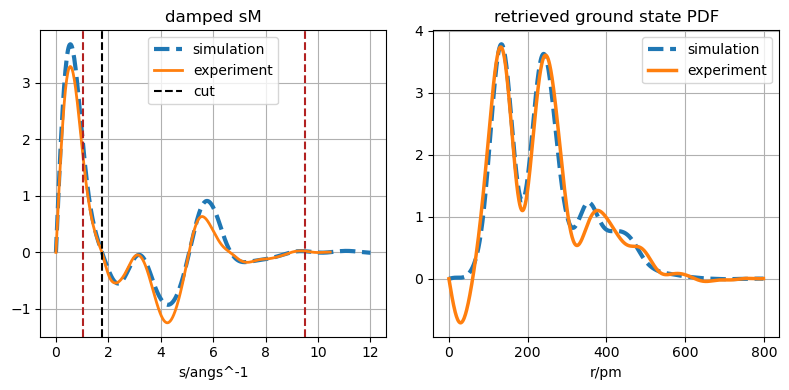

In [7]:
# (4) Extratin the static scattering signal
s_cali = 0.0226
[coor,atom_sum]  = gt.load_static_mol_coor(path_mol,mol_name,file_type);
[I,I_at,I_mol,s] = gt.get_I_from_xyz(f,s000,s_max,coor,atom_sum);
# [sM,PDF,r]       = get_sM_and_PDF_from_I(I_at,I_mol,s,r_max,damp_const)


I_ground_state=norm_ref; # experimental static scattering signal
#I_ground_state = np.nanmean(norm_data[5:20], axis=0)

gt.retrieve_PDF(left,right,s_cali,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_ground_state);# function to retrive to retrive the static signal

## Calculate sM

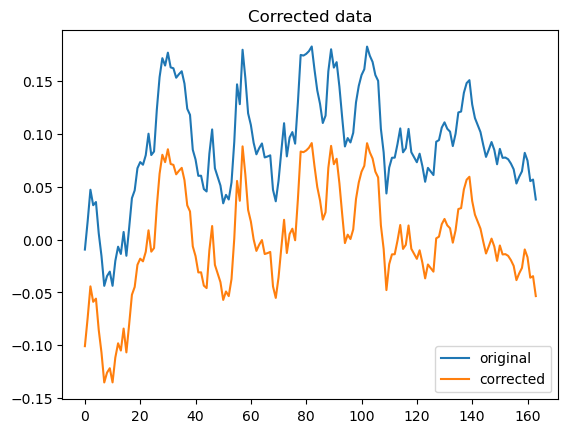

(37, 464)


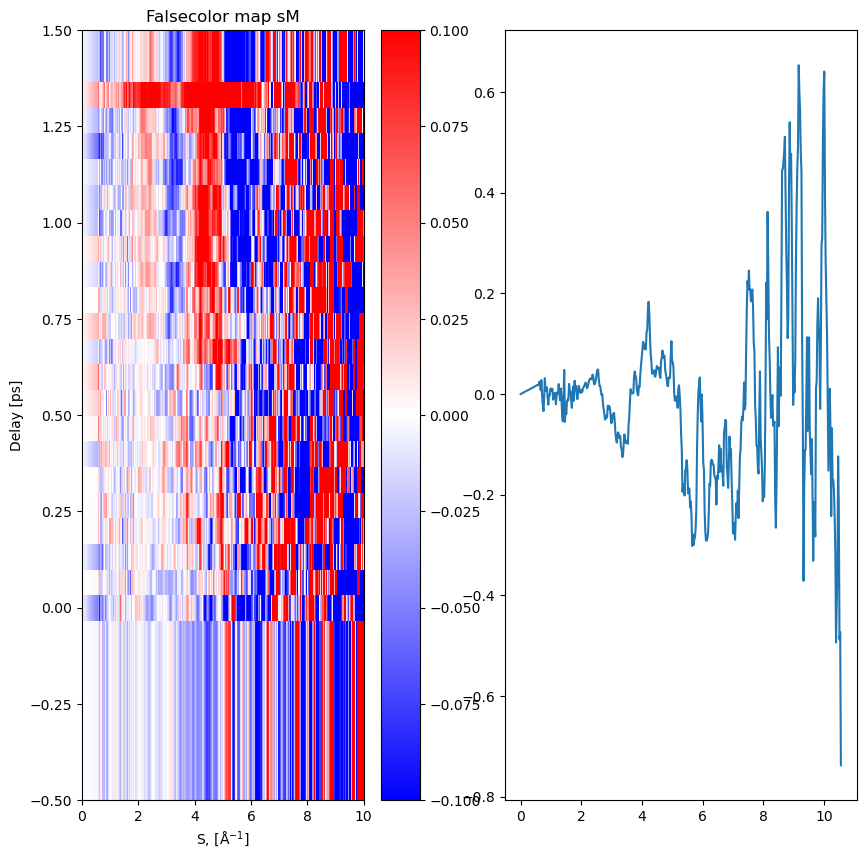

In [8]:
s_good = s_exp

dI = (norm_data - norm_ref)
dI_fit = gt.power_fit(dI, s_good)
dI_corrected = gt.correct_offset(dI)

sM = gt.get_sM(f, s000, s_good, coor, atom_sum, dI_corrected)

print(sM.shape)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pcolor(s_good, realtime, sM,cmap='bwr')
plt.clim(vmin=-0.1, vmax=0.1);
plt.colorbar()
plt.ylim(-0.5, 1.5)
plt.xlim(0, 10)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map sM')

plt.subplot(1,2,2)
plt.plot(s_good, sM[-1])
plt.show()

## Calculate PDF

In [9]:
pdf_exp, r = gt.get_exp_PDF(sM, s_good, 10, s_cali)
# PDF_exp = []
# for i in range(len(sM)):
#     temp_sM, temp_PDF, r = get_exp_PDF(sM1[0], s_1, 10, damp_const)
#     PDF_exp.append(temp_PDF)
    
# PDF_exp = np.array(PDF_exp)
print(pdf_exp.shape)

0.0226
(37, 1000)


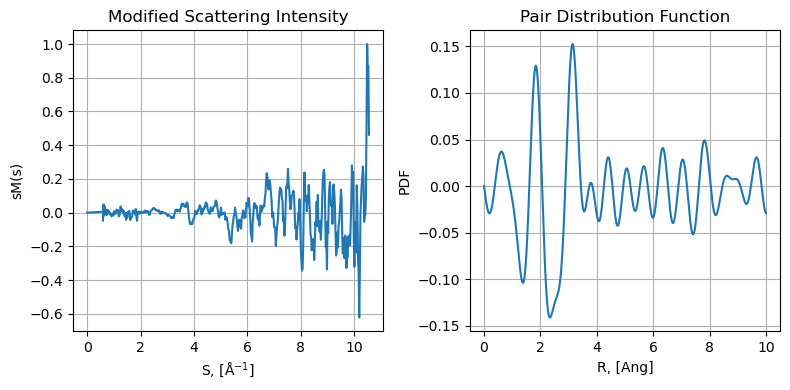

In [10]:

plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s_good,sM[10]);
plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('sM(s)');plt.title('Modified Scattering Intensity');plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r,pdf_exp[30]);
plt.xlabel(r'R, [Ang]');
plt.ylabel('PDF');
plt.title('Pair Distribution Function');
plt.grid()
    
plt.tight_layout()
plt.show()

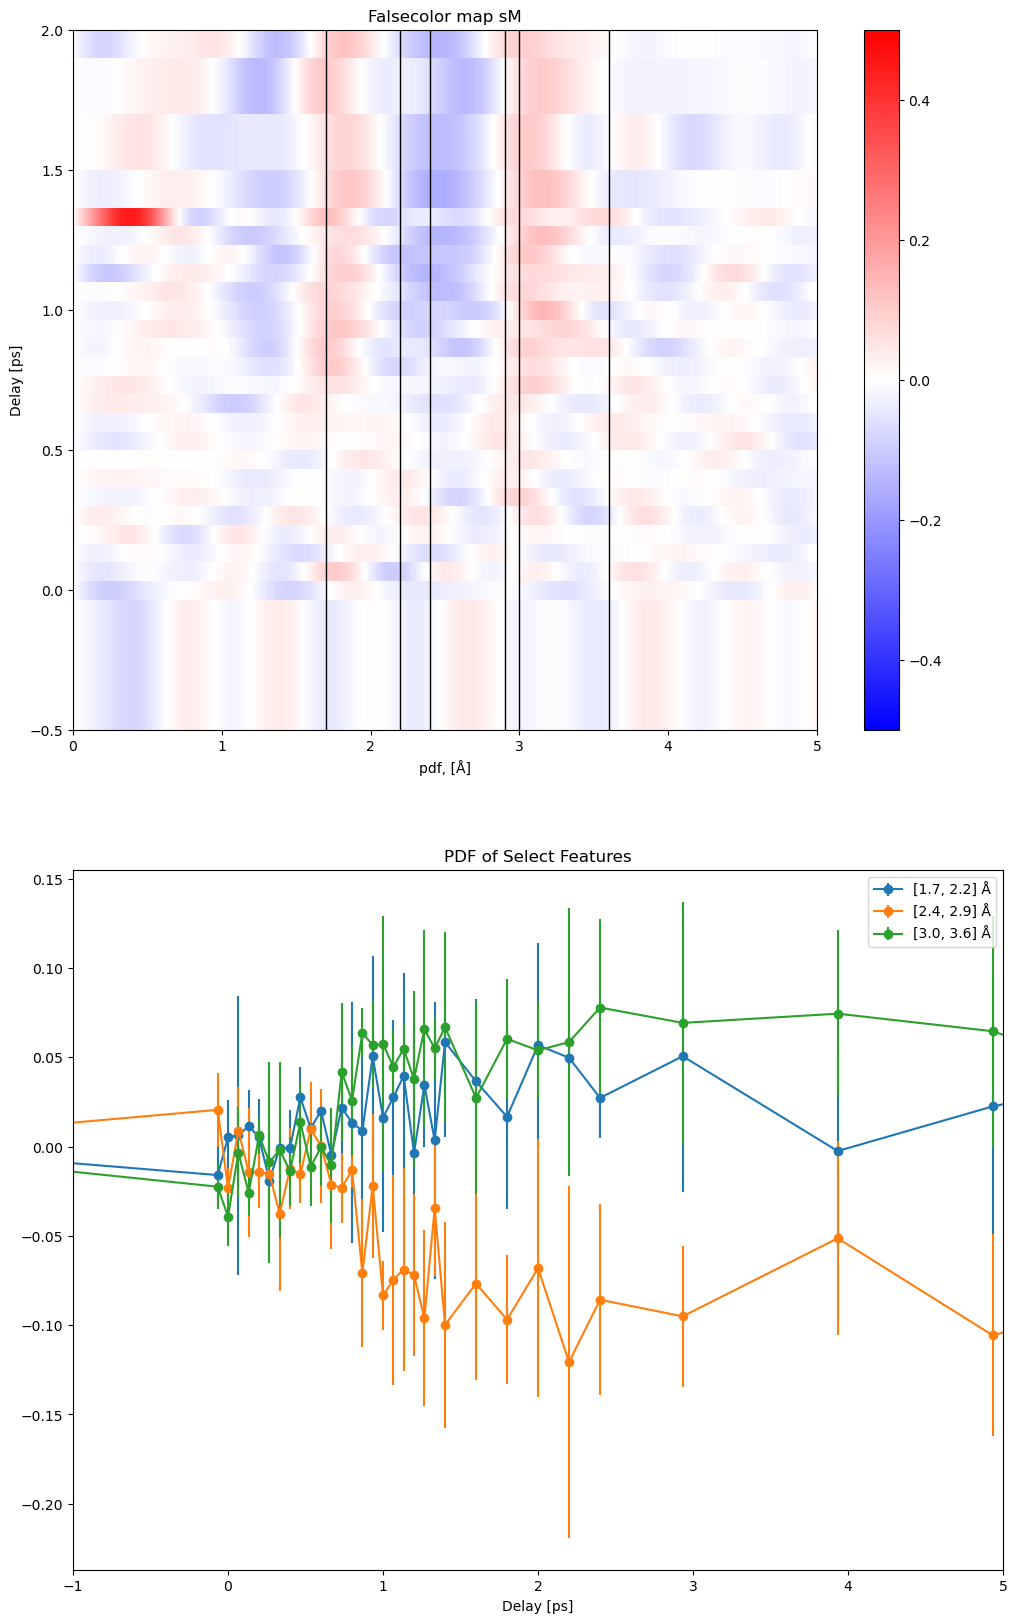

In [11]:
RoI_1 = [1.7, 2.2];
RoI_2 = [2.4, 2.9];
RoI_3 = [3.0, 3.6];


Inte_1 = np.mean(pdf_exp[:, (np.where((r > RoI_1[0]) & (r < RoI_1[1]))[0])], axis=1)
std_1 = np.std(pdf_exp[:, (np.where((r > RoI_1[0]) & (r < RoI_1[1]))[0])], axis=1)
Inte_2 = np.mean(pdf_exp[:, (np.where((r > RoI_2[0]) & (r < RoI_2[1]))[0])], axis=1)
std_2 = np.std(pdf_exp[:, (np.where((r > RoI_2[0]) & (r < RoI_2[1]))[0])], axis=1)
Inte_3 = np.mean(pdf_exp[:, (np.where((r > RoI_3[0]) & (r < RoI_3[1]))[0])], axis=1)
std_3 = np.std(pdf_exp[:, (np.where((r > RoI_3[0]) & (r < RoI_3[1]))[0])], axis=1)

plt.figure(figsize=(12,20))
plt.subplot(2,1,1)
plt.pcolor(r, realtime, pdf_exp,cmap='bwr')
plt.axvline(x = RoI_1[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_1[1], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[1], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_3[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_3[1], color = 'k', linestyle = '-',linewidth=1)

plt.clim(vmin=-0.5, vmax=0.5);
plt.colorbar()
plt.ylim(-0.5, 2.0)
plt.xlim(0, 5)
plt.xlabel(f"pdf, [{angs}]")
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map sM')

plt.subplot(2,1,2)
plt.errorbar(realtime,Inte_1, yerr=std_1,  fmt='-o',  label=str(RoI_1)+' '+angs);
plt.errorbar(realtime, Inte_2, yerr=std_2,  fmt='-o', label=str(RoI_2)+' '+angs);
plt.errorbar(realtime, Inte_3, yerr = std_3, fmt='-o', label=str(RoI_3)+' '+angs)
plt.xlim(-1, 5)
plt.legend()
plt.xlabel('Integrated Yield [arb.]');plt.xlabel('Delay [ps]');plt.title('PDF of Select Features')

plt.show()